#  #3- Supervised Learning - Linear Models with multiple-variables #

## Multiple Features ##

Linear regression with multiple variables is also known as "multivariate linear regression".

We now introduce notation for equations where we can have any number of input variables.

$\begin{align*}x_j^{(i)} &= \text{value of feature } j \text{ in the }i^{th}\text{ training example} \newline x^{(i)}& = \text{the input (features) of the }i^{th}\text{ training example} \newline m &= \text{the number of training examples} \newline n &= \text{the number of features} \end{align*}$

The multivariable form of the hypothesis function accommodating these multiple features is as follows:

$h_\theta(x)= \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3  + ... + \theta_nx_n $

In order to develop intuition about this function, we can think about $\theta_0$ as the basic price of a house, $\theta_1$ as the price per square meter, $\theta_2$ as the price per floor, etc. $x_1$ will be the number of square meters in the house, $x_2$ the number of floors, etc.

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:

$\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}$

Remark: Note that for convenience reasons in this course we assume $x_0^{(i)}=1 \text{ for } (i\in { 1,\dots, m } )$. This allows us to do matrix operations with theta and $x$. Hence making the two vectors $\theta$ and $x^{(i)}$ match each other element-wise (that is, have the same number of elements: n+1).

## Gradient Descent for Multiple Variables ##

The gradient descent equation itself is generally the same form; we just have to repeat it for our 'n' features:

$\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}$

The following image compares gradient descent with one variable to gradient descent with multiple variables:
![](gradient_multiple_1.png)

## Let's try this out ##

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Lets explore our data
print("Keys of diabetes dataset: \n{}".format(diabetes.keys()))

# Description of the dataset 
print(diabetes['DESCR'][:900] + "\n...")

print(diabetes['feature_names'])



Keys of diabetes dataset: 
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each 

In [6]:
# Use only one feature
diabetes_X = np.array(diabetes.data)
print(diabetes_X)


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #80%
diabetes_X_test = diabetes_X[-20:] #20%
# print(diabetes_X_train)

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
# print(diabetes_y_test)





[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [8]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Variance score: 0.59


## Gradient Descent in Practice I - Feature Scaling ##

We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$$−1 ≤ x_{(i)} ≤ 1$$ or $$−0.5 ≤ x_{(i)}≤ 0.5 $$

These aren't exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are **feature scaling** and mean **normalization**. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:

$$x_i := \frac{x_i - μ_i}{s_i} $$

Where $μ_i$ is the average of all the values for feature (i) and $s_i$ is the range of values (max - min), or $s_i$ is the standard deviation.

For example, if $x_i$ represents housing prices with a range of 100 to 2000 and a mean value of 1000, then, $xi:= \dfrac{price-1000}{1900}$ .



## Gradient Descent in Practice II - Learning Rate ##

Debugging gradient descent. Make a plot with number of iterations on the x-axis. Now plot the cost function, J(θ) over the number of iterations of gradient descent. If J(θ) ever increases, then you probably need to decrease α.

In [3]:
cur_x = 600 # The algorithm starts at x=3
rate = 0.7 #Learning rate - this is the a
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function 

thetas = [cur_x]
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    thetas.append(cur_x)
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is -1215.0
Iteration 2 
X value is 2415.0
Iteration 3 
X value is -4845.0
Iteration 4 
X value is 9675.0
Iteration 5 
X value is -19365.0
Iteration 6 
X value is 38715.0
Iteration 7 
X value is -77445.0
Iteration 8 
X value is 154875.0
Iteration 9 
X value is -309765.0
Iteration 10 
X value is 619515.0
Iteration 11 
X value is -1239045.0
Iteration 12 
X value is 2478075.0
Iteration 13 
X value is -4956165.0
Iteration 14 
X value is 9912315.0
Iteration 15 
X value is -19824645.0
Iteration 16 
X value is 39649275.0
Iteration 17 
X value is -79298565.0
Iteration 18 
X value is 158597115.0
Iteration 19 
X value is -317194245.0
Iteration 20 
X value is 634388475.0
Iteration 21 
X value is -1268776965.0
Iteration 22 
X value is 2537553915.0
Iteration 23 
X value is -5075107845.0
Iteration 24 
X value is 10150215675.0
Iteration 25 
X value is -20300431365.0
Iteration 26 
X value is 40600862715.0
Iteration 27 
X value is -81201725445.0
Iteration 28 
X value is 162403450875

X value is 7.735942647567057e+150
Iteration 493 
X value is -1.5471885295134114e+151
Iteration 494 
X value is 3.094377059026823e+151
Iteration 495 
X value is -6.188754118053646e+151
Iteration 496 
X value is 1.237750823610729e+152
Iteration 497 
X value is -2.475501647221458e+152
Iteration 498 
X value is 4.951003294442916e+152
Iteration 499 
X value is -9.902006588885833e+152
Iteration 500 
X value is 1.9804013177771666e+153
Iteration 501 
X value is -3.960802635554333e+153
Iteration 502 
X value is 7.921605271108666e+153
Iteration 503 
X value is -1.5843210542217333e+154
Iteration 504 
X value is 3.1686421084434665e+154
Iteration 505 
X value is -6.337284216886933e+154
Iteration 506 
X value is 1.2674568433773866e+155
Iteration 507 
X value is -2.534913686754773e+155
Iteration 508 
X value is 5.069827373509546e+155
Iteration 509 
X value is -1.0139654747019093e+156
Iteration 510 
X value is 2.0279309494038186e+156
Iteration 511 
X value is -4.055861898807637e+156
Iteration 512 
X v

X value is -5.953352736999795e+263
Iteration 868 
X value is 1.190670547399959e+264
Iteration 869 
X value is -2.381341094799918e+264
Iteration 870 
X value is 4.762682189599836e+264
Iteration 871 
X value is -9.525364379199672e+264
Iteration 872 
X value is 1.9050728758399343e+265
Iteration 873 
X value is -3.8101457516798686e+265
Iteration 874 
X value is 7.620291503359737e+265
Iteration 875 
X value is -1.5240583006719475e+266
Iteration 876 
X value is 3.048116601343895e+266
Iteration 877 
X value is -6.09623320268779e+266
Iteration 878 
X value is 1.219246640537558e+267
Iteration 879 
X value is -2.438493281075116e+267
Iteration 880 
X value is 4.876986562150232e+267
Iteration 881 
X value is -9.753973124300464e+267
Iteration 882 
X value is 1.9507946248600927e+268
Iteration 883 
X value is -3.9015892497201855e+268
Iteration 884 
X value is 7.803178499440371e+268
Iteration 885 
X value is -1.5606356998880742e+269
Iteration 886 
X value is 3.1212713997761484e+269
Iteration 887 
X va

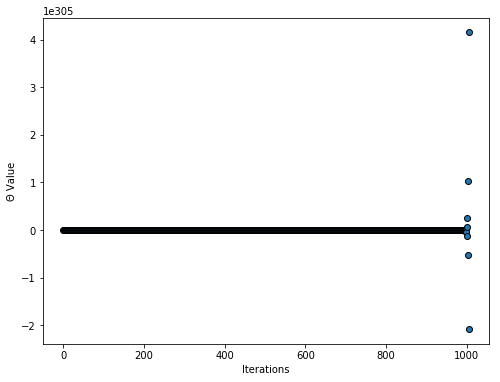

In [4]:
import matplotlib.pyplot as plt

X_axis = 0
Y_axis = 1
 
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(range(0,iters+1),thetas,
            edgecolor='k') #Using only the 2 features for diplaying a scatter plot, c is the target and cmap is the color map to be used
plt.xlabel("Iterations")
plt.ylabel("Θ Value")
plt.show()

Automatic convergence test. Declare convergence if J(θ) decreases by less than E in one iteration, where E is some small value such as $10^{−3}$. However in practice it's difficult to choose this threshold value.


It has been proven that if learning rate α is sufficiently small, then J(θ) will decrease on every iteration.
![](gradient_multiple_2.png)